In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('data/Titanic/train.csv')
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [6]:
# Let's find out the shape/size of our dataset
df.shape

(891, 12)

In [7]:
# Let's find out the data types and number of null values for each column/feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


We find that there are missing values for 'Age', and 'Cabin'. 'Embarked' has a couple of missing values which shouldn't be an issue. 

I'm a bit curious so let's take a look at the rows that have the 'Embarked parameter missing. Perhaps we can use features in these rows and others to determine what the value of embarking point would have been.

In [8]:
df[df['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Interesting, both passengers stayed were in the same cabin, belonged to first class, and survived! After some googling, I learnt that Miss Amelie was the maid to Mrs. Stone and they both boarded from Southamption.

Now, let's take a closer look at our features individually to observe their raw distribution.

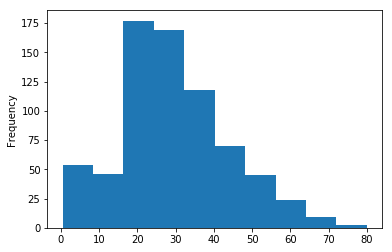

In [9]:
df['Age'].plot(kind='hist')

This tells us most of the people aboard the Titanic (or to be accurate, in this dataset) were in the age range of ~18-30, and we have a continuos decrease in frequency as we increase our age. Let us look at the distribution of the 'Age' feature in some more ways using methods available in Pandas.

In [10]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

You could also use df['Age'].value_counts(). These functions do a great job of giving us more information regarding the most common values held, mean, standard deviation, etc. 

However, we humans (most of us?) are much better at getting a quick perception and summary of the data using visualizations. So now, let's create multiple plots so that we can observe the raw distribution of all relevant features in the same figure.

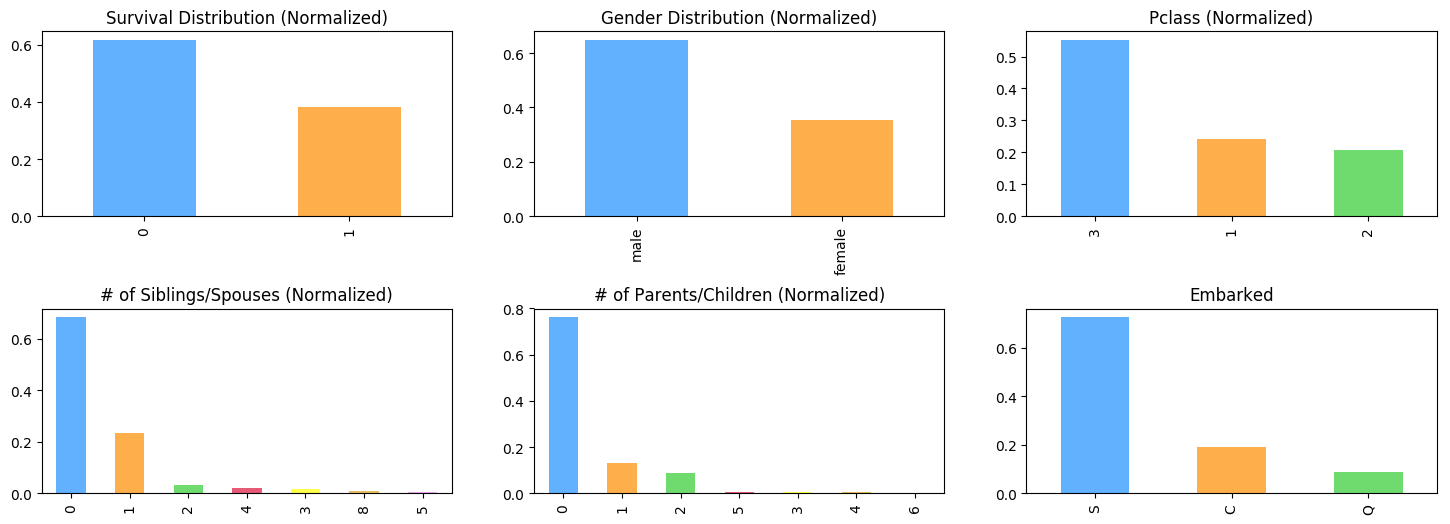

In [11]:
# Survived, Pclass, Sex, Age, SibSp, Parch, Fare, Embarked
plt.style.use('default')

fig = plt.figure(figsize=(18,6))
plt.subplots_adjust(hspace=.5)

plt.subplot2grid((2,3), (0,0))
df['Survived'].value_counts(normalize=True).plot(kind='bar', alpha=0.7, color=['#1E90FF','#FF8C00'])
plt.title('Survival Distribution (Normalized)')

plt.subplot2grid((2,3), (0,1))
df['Sex'].value_counts(normalize=True).plot(kind='bar', alpha=0.7, color=['#1E90FF','#FF8C00'])
plt.title('Gender Distribution (Normalized)')

plt.subplot2grid((2,3), (0,2))
df['Pclass'].value_counts(normalize=True).plot(kind='bar', alpha=0.7, color=['#1E90FF','#FF8C00', '#32CD32'])
plt.title('Pclass (Normalized)')

plt.subplot2grid((2,3), (1,0))
df['SibSp'].value_counts(normalize=True).plot(kind='bar', alpha=0.7, color=['#1E90FF','#FF8C00', '#32CD32', 
                                                                            '#DC143C', '#FFFF00', '#DAA520',
                                                                           '#EE82EE'])
plt.title('# of Siblings/Spouses (Normalized)')

plt.subplot2grid((2,3), (1,1))
df['Parch'].value_counts(normalize=True).plot(kind='bar', alpha=0.7, color=['#1E90FF','#FF8C00', '#32CD32',
                                                                           '#DC143C', '#FFFF00', '#DAA520',
                                                                           '#EE82EE'])
plt.title('# of Parents/Children (Normalized)')

plt.subplot2grid((2,3), (1,2))
df['Embarked'].value_counts(normalize=True).plot(kind='bar', alpha=0.7, color=['#1E90FF','#FF8C00', '#32CD32'])
plt.title('Embarked')

plt.savefig('plots/dataset_distribution.png', dpi=300, transparent=False)

Right then, so now we know that most of people died, the number of men are twice as many as the women, most people belonged to the Ticket Class 3, did not travel with their siblings/spouses/parents/children, and embarked from Southampton. All this with a quick glance! You will notice I used percentage notion instead o just raw numbers, as this gives a better perception regarding the distribution :-)

We can expand this work establish relationships between independent features, if any. For example, what is the survival rate based on gender, or ticket class? To observe these bivariate relationships, let's use a similar subplot structure like we used to view the univariate distributions above.

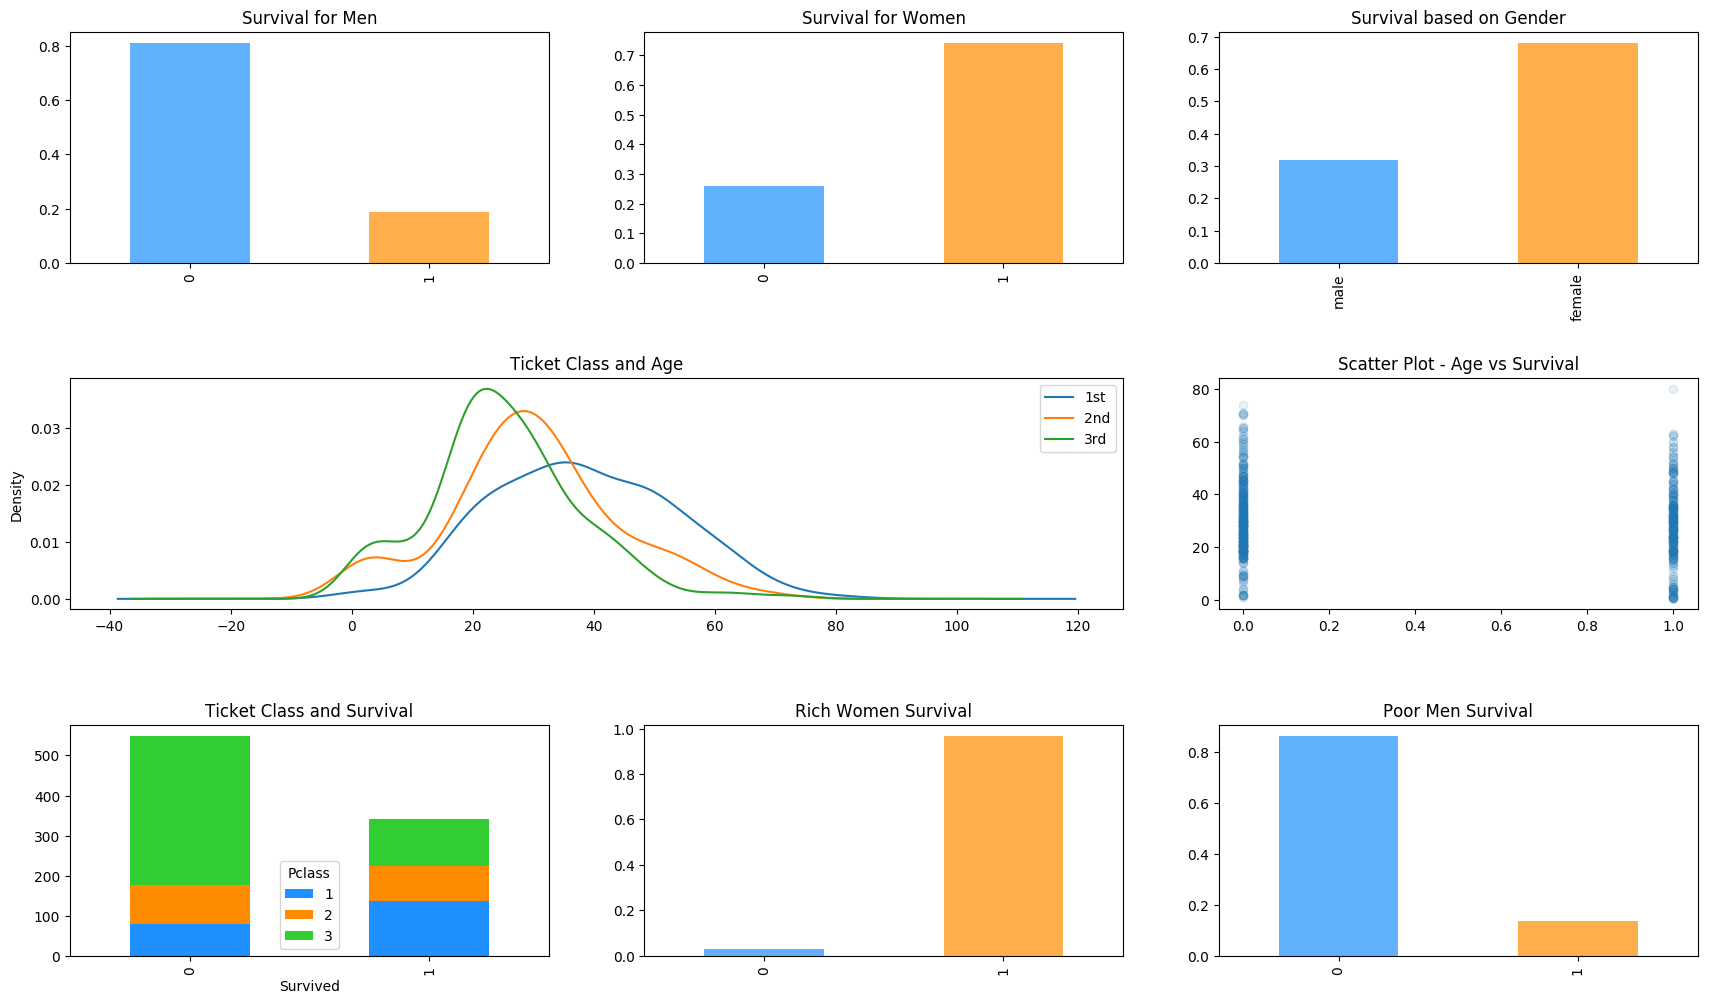

In [42]:
fig = plt.figure(figsize=(21,12))
plt.subplots_adjust(hspace=0.5)

plt.subplot2grid((3,3), (0,0))
male = df[df['Sex']=='male']
male['Survived'].value_counts(normalize=True).plot(kind='bar', alpha=0.7, color=['#1E90FF','#FF8C00'])
plt.title('Survival for Men')

plt.subplot2grid((3,3), (0,1))
female = df[df['Sex']=='female']
female['Survived'].value_counts(normalize=True, ascending=True).plot(kind='bar', alpha=0.7, color=['#1E90FF','#FF8C00'])
plt.title('Survival for Women')

plt.subplot2grid((3,3), (0,2))
df['Sex'][df['Survived']==1].value_counts(normalize=True, ascending=True).plot(kind='bar', alpha=0.7, color=['#1E90FF','#FF8C00'])
plt.title('Survival based on Gender')

plt.subplot2grid((3,3), (1,0), colspan=2)
for ticketclass in sorted(df['Pclass'].unique()):
    df['Age'][df['Pclass']==ticketclass].plot(kind='kde')
plt.legend(('1st','2nd','3rd'))
plt.title('Ticket Class and Age')

plt.subplot2grid((3,3), (1,2))
plt.scatter(df['Survived'], df['Age'], alpha=0.1)
plt.title('Scatter Plot - Age vs Survival')

ax = plt.subplot2grid((3,3), (2,0))
df.groupby(['Survived', 'Pclass']).size().unstack().plot(kind='bar', stacked=True, ax=ax, color=['#1E90FF','#FF8C00', '#32CD32'])
plt.title('Ticket Class and Survival')

plt.subplot2grid((3,3), (2,1))
df['Survived'][(df['Sex']=='female') & (df['Pclass']==1)].value_counts(normalize=True, ascending=True).plot(kind='bar', alpha=0.7, color=['#1E90FF','#FF8C00'])
plt.title('Rich Women Survival')

plt.subplot2grid((3,3), (2,2))
df['Survived'][(df['Sex']=='male') & (df['Pclass']==3)].value_counts(normalize=True).plot(kind='bar', alpha=0.7, color=['#1E90FF','#FF8C00'])
plt.title('Poor Men Survival')

plt.savefig('plots/bivariate_analysis.png', dpi=300, transparent=False)

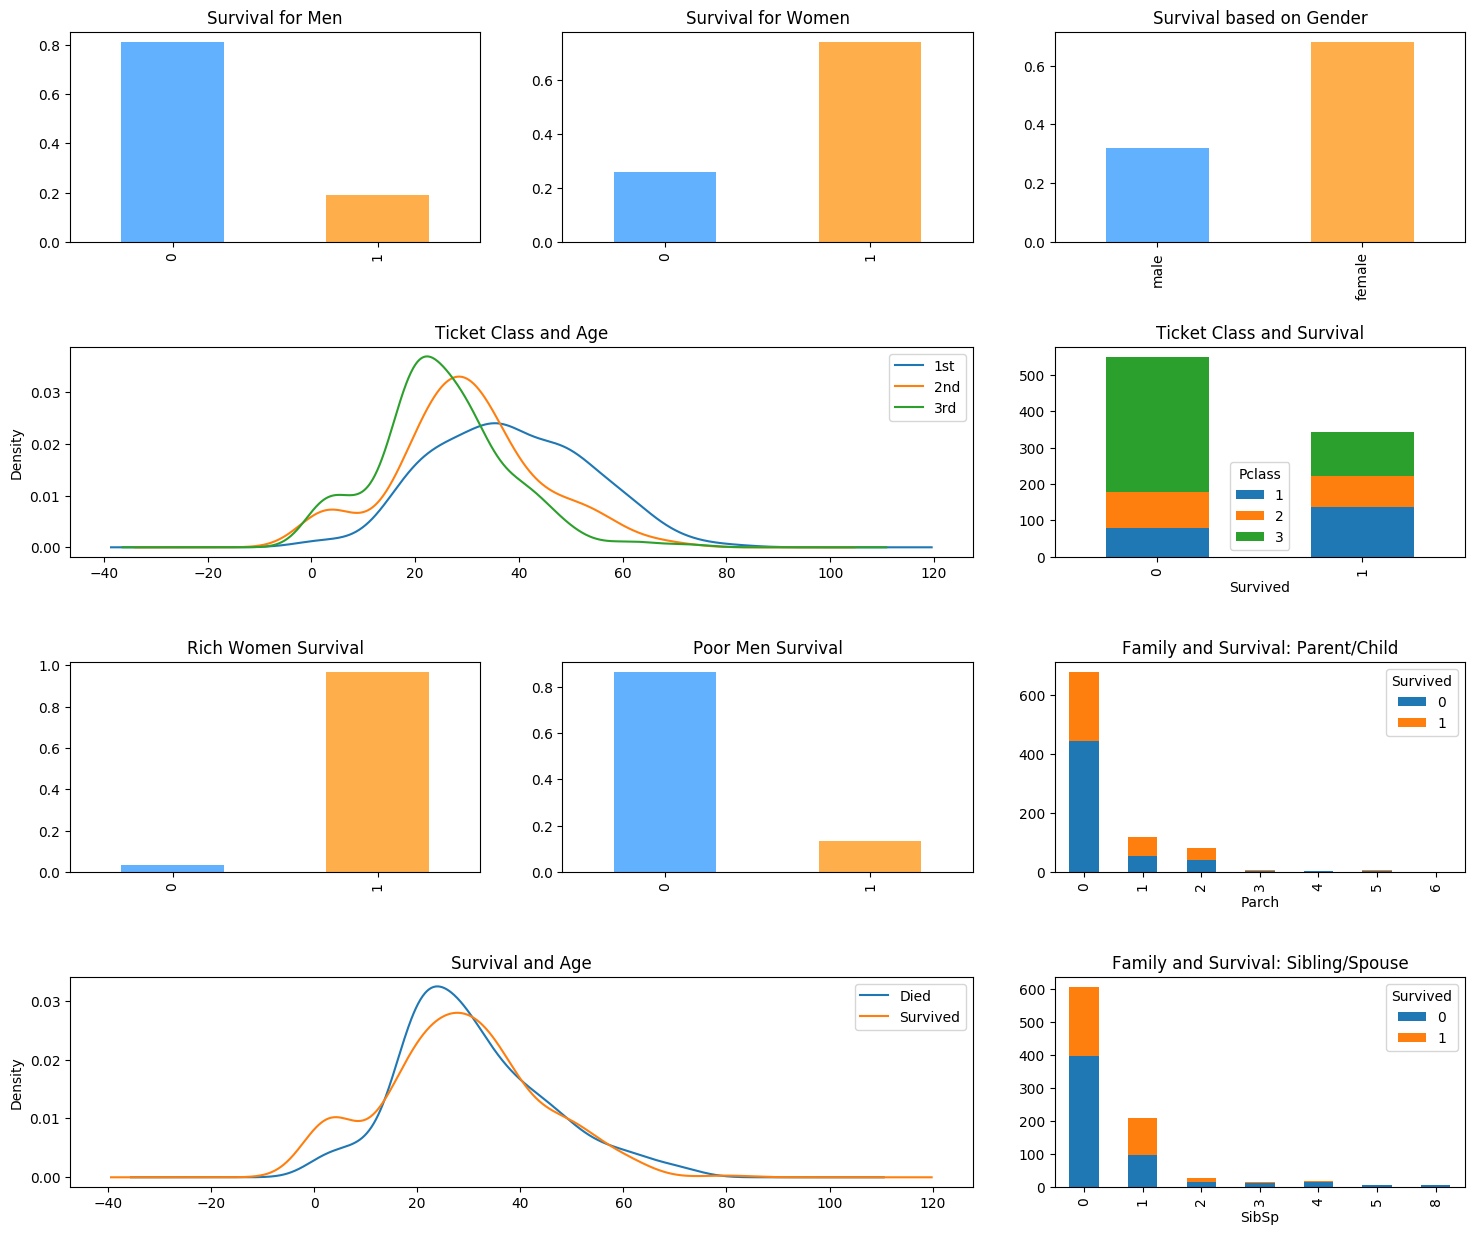

In [15]:
fig = plt.figure(figsize=(18,15))
plt.subplots_adjust(hspace=0.5)

plt.subplot2grid((4,3), (0,0))
male = df[df['Sex']=='male']
male['Survived'].value_counts(normalize=True).plot(kind='bar', alpha=0.7, color=['#1E90FF','#FF8C00'])
plt.title('Survival for Men')

plt.subplot2grid((4,3), (0,1))
female = df[df['Sex']=='female']
female['Survived'].value_counts(normalize=True, ascending=True).plot(kind='bar', alpha=0.7, color=['#1E90FF','#FF8C00'])
plt.title('Survival for Women')

plt.subplot2grid((4,3), (0,2))
df['Sex'][df['Survived']==1].value_counts(normalize=True, ascending=True).plot(kind='bar', alpha=0.7, color=['#1E90FF','#FF8C00'])
plt.title('Survival based on Gender')

plt.subplot2grid((4,3), (1,0), colspan=2)
for ticketclass in sorted(df['Pclass'].unique()):
    df['Age'][df['Pclass']==ticketclass].plot(kind='kde')
plt.legend(('1st','2nd','3rd'))
plt.title('Ticket Class and Age')

ax = plt.subplot2grid((4,3), (1,2))
df.groupby(['Survived', 'Pclass']).size().unstack().plot(kind='bar', stacked=True, ax=ax)
plt.title('Ticket Class and Survival')

plt.subplot2grid((4,3), (2,0))
df['Survived'][(df['Sex']=='female') & (df['Pclass']==1)].value_counts(normalize=True, ascending=True).plot(kind='bar', alpha=0.7, color=['#1E90FF','#FF8C00'])
plt.title('Rich Women Survival')

plt.subplot2grid((4,3), (2,1))
df['Survived'][(df['Sex']=='male') & (df['Pclass']==3)].value_counts(normalize=True).plot(kind='bar', alpha=0.7, color=['#1E90FF','#FF8C00'])
plt.title('Poor Men Survival')

ax = plt.subplot2grid((4,3), (2,2))
df.groupby(['Parch', 'Survived']).size().unstack().plot(kind='bar', stacked=True, ax=ax)
plt.title('Family and Survival: Parent/Child')

plt.subplot2grid((4,3), (3,0), colspan=2)
for survived in sorted(df['Survived'].unique()):
    df['Age'][df['Survived']==survived].plot(kind='kde')
plt.legend(('Died','Survived'))
plt.title('Survival and Age')

ax = plt.subplot2grid((4,3), (3,2))
df.groupby(['SibSp', 'Survived']).size().unstack().plot(kind='bar', stacked=True, ax=ax)
plt.title('Family and Survival: Sibling/Spouse')

plt.show()

We are really starting to spot some trends with these graphs.

1. From the first row of graphs, it is easy to see that the survival rate for men is much lower than that of women on the ship.
2. The ticket class has a role to play as well. The older you are, the likelier it is that you were able to get a higher class seat. The plot adjacent to it shows that the first class had more people surviving than dying while quite the opposite was true for passengers of class 3.
3. The first two plots of the third row show likelihood of survival for rich women (ticket class 1) and poor men (ticket class 3). An analysis based on fare would be interesting as well.
4. From the kde plot, you can see that there if you were under a certain age, you had a higher chance for survival. The bar graphs in row 3 and 4 show that if you had some family, your chances of survival were better than the passenger who had no family on board

From the above graphs, one can make a simple model, predict all women to survive. This will be an appropriate first submission before using any algorithms. It gives a score of 0.76555, a strong improvement on a coin toss. But our model wouldn't really be anything to boast about. For that, we must use some learning algorithms. But before that, we should try to perform some feature engineering on our dataset. The *Name* column is a good place to begin our experimentation at.

In [16]:
# Extract the titles from names
titles = df['Name'].str.extract(' ([A-za-z]+)\.', expand=False)

# Create a dataframe of titles and survival
titles_df = pd.DataFrame()
titles_df['Title'] = titles
titles_df['Survived'] = df['Survived']

In [17]:
# Have a look at the raw numbers
titles_df.groupby(['Title', 'Survived']).size().unstack().T

Title,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Survived,,,,,,,,,,,,,,,,,
0,1.0,1.0,NaN,1.0,4.0,1.0,NaN,1.0,17.0,55.0,NaN,NaN,436.0,26.0,NaN,6.0,NaN
1,NaN,1.0,1.0,NaN,3.0,NaN,1.0,1.0,23.0,127.0,2.0,1.0,81.0,99.0,1.0,NaN,1.0


Great, but it will be better if we plot this information. Most of the titles here have only one or two values so let's use value_counts to find the most common titles 

In [19]:
titles_df['Title'].value_counts().head(6)

Mr        517
Miss      182
Mrs       125
Master     40
Dr          7
Rev         6
Name: Title, dtype: int64

Right then, let's plot the survival of passengers with the above titles and see if we can spot something

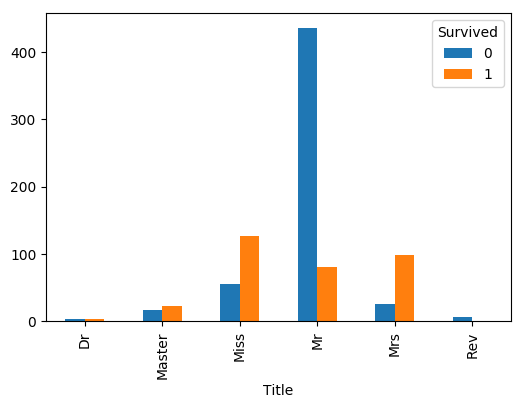

In [25]:
fig, ax = plt.subplots(figsize=(6,4))
mask_titles = ['Mr', 'Miss', 'Mrs', 'Master', 'Rev', 'Dr']
titles_df = titles_df.loc[titles_df['Title'].isin(mask_titles), :]
titles_df.groupby(['Title', 'Survived']).size().unstack().plot(kind='bar', ax=ax)
plt.show()

Beautiful, this shows us as that all passengers with title 'Rev' did not survived while passengers with title 'Mrs' and 'Miss' had a much higher likelihood  of survival. This added information could be useful for our model. Before we fit our model to the training data, however, we must perform the following steps:

1. Fill in missing values with an average representation of that feature in the dataset. 
2. Categorical variables like 'Sex', 'Embarked', etc. need to be converted to numeric values for the learning algorithm.
3. Add the engineered features
4. Drop meaningless features/columns
5. Perform [one hot encoding](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f) so that the linear model can perform better.
6. Import different classifiers

First, let's import our models and helper functions. I will primarily be using the [sklearn](https://scikit-learn.org/stable/index.html) libray

In [27]:
# Importing different learning algorithms
from sklearn import linear_model
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

* Now, let's write some functions to help clean our data. We want these to be generic and pragmatic. Note, that the test set also needs to go through the same steps. We should therefore, combine the training and test data

* I will read the training data again and start modifying it. The reason for this is that I want to always be able to access the unmodified training data, stored in variable *df*. I could have just used *df.copy()* but this dataset is small and reading it again is a foolproof way of ensuring the data has not been maligned in any of the above steps. 

In [29]:
train = pd.read_csv('data/Titanic/train.csv')
test = pd.read_csv('data/Titanic/test.csv')
train_test = train.append(test, sort=False)

train_test.reset_index(inplace=True)
train_test.drop(['index'], inplace=True, axis=1)
train_test.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


The first step can be to write a function that adds titles for the passengers from the *Name* column, based on our findings in the EDA

In [30]:
def add_titles(data):
    # Extract titles from Name section
    data['Title'] = data['Name'].str.extract(' ([A-za-z]+)\.', expand=False)
    
    # Title dictionary based on EDA, key 5 effectively translates to 'other title'
    title_mapping = {"Mr": 'Mr',
                     "Miss": 'Miss',
                     "Mrs": 'Mrs', 
                     "Master": 'Master',
                     "Rev": 'Rev',
                     "Dr": 'Other',
                     "Col": 'Other',
                     "Major": 'Other', 
                     "Mlle": 'Other',
                     "Countess": 'Other',
                     "Ms": 'Other',
                     "Lady": 'Other',
                     "Jonkheer": 'Other',
                     "Don": 'Other',
                     "Dona" : 'Other',
                     "Mme": 'Other',
                     "Capt": 'Other',
                     "Sir": 'Other'}
    
    data['Title'] = data['Title'].map(title_mapping)

In [31]:
add_titles(train_test)

Now, let's fill the missing values for the *Fare*

In [32]:
def clean_fare(data):
    # Fare in the training set has no missing values but test set does
    data['Fare'] = data['Fare'].fillna(data['Fare'].dropna().median())    

In [33]:
clean_fare(train_test)

Let's work on filling the missing values for *Age*. But first, some more EDA to guide us!

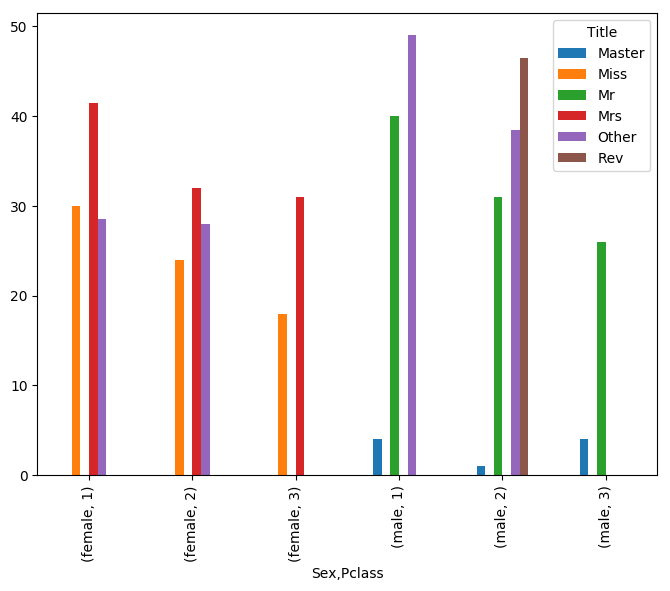

In [34]:
fig, ax = plt.subplots(figsize=(8,6))
age_grouped = train_test.iloc[:891].groupby(['Sex','Pclass','Title'])
age_grouped['Age'].median().unstack().plot(kind = 'bar', ax=ax)
plt.show()

I have grouped the age by Gender, Ticket class, and Title to get the median age. We can use this information to fill the missing values in a smarter fashion.

In [35]:
age_grouped = train_test.iloc[:891].groupby(['Sex','Pclass','Title'])
age_grouped = age_grouped.median()
age_grouped = age_grouped.reset_index()[['Sex', 'Pclass', 'Title', 'Age']]
age_grouped.head(3)

,Sex,Pclass,Title,Age
0,female,1,Miss,30.0
1,female,1,Mrs,41.5
2,female,1,Other,28.5


Great, now let's write a function to fill the missing values of age in the training and test set with these 'smarter' statistics

In [36]:
def clean_age(data):
    data["Age"] = data.groupby(['Sex','Pclass','Title'])['Age'].transform(lambda x: x.fillna(x.median()))

In [37]:
clean_age(train_test)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1076: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


Let's make sure there are no null values left

In [40]:
train_test.loc[train_test['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
979,980,NaN,3,"O'Donoghue, Ms. Bridget",female,NaN,0,0,364856,7.75,NaN,Q,Other


There is a null value and it makes sense why! There was no one in the dataset that was a female, with a title as Ms. (Other in my mapping) and belonging to class 3. The plot confirms this too. Let's fill this passenger's age with the median age for the entire dataset.

In [41]:
train_test.loc[979, 'Age'] = train_test['Age'].median()

In [42]:
def clean_embarked(data):
    # Fill missing values with most common embarkment point
    data['Embarked'] = data['Embarked'].fillna('S')

In [43]:
clean_embarked(train_test)

Now let's work on the label encoding and one hot encoding for the categorical features in our dataset

In [44]:
# Add label and one-hot encoding for categorical lables

def encode(data, labels):
    for label in labels:
        data = data.join(pd.get_dummies(data[label], prefix = label))
        data.drop(label, axis=1, inplace=True)
    return data

Store a copy of the train_test data at this stage for workflow purposes

In [45]:
store = train_test.copy()

Run encoding on the combined train_test data

In [46]:
train_test = encode(train_test, ['Pclass', 'Sex', 'Embarked', 'Title'])
train_test.head(1).T

,0
PassengerId,1
Survived,0
Name,"Braund, Mr. Owen Harris"
Age,22
SibSp,1
Parch,0
Ticket,A/5 21171
Fare,7.25
Cabin,NaN
Pclass_1,0


Separate train and test data!

In [47]:
train = train_test.loc[:890, :]
test = train_test.loc[891:, :]

Brilliant, time to test our first model. Let's create a function that separate the target/dependent variable, drops meaningless rows and prints the k-fold cross-validation score

In [48]:
def model(classifier, train, test):
    target = train['Survived'].values
    features = train.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis = 1).values
    
    scores = cross_val_score(classifier, features, target, cv=5)
    print(f'Scores for 5 fold CV: {round(np.mean(scores*100))}')
    
    classifier_ = classifier.fit(features, target)
    # print(classifier_.score(X_test, y_test))
    test = test.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis = 1)
    predictions = classifier_.predict(test).astype(int)
    
    return predictions

In [57]:
def submit(predictions):
    submission = pd.read_csv('data/Titanic/gender_submission.csv')
    submission['Survived'] = predictions
    submission.to_csv('data/Titanic/submission.csv', index=False)
    return submission

In [58]:
classifier = linear_model.LogisticRegression(solver='liblinear')
predictions = model(classifier, train, test)

Scores for 5 fold CV: 83.0


In [59]:
classifier = SVC(gamma='auto', kernel='linear')
predictions = model(classifier, train, test)

Scores for 5 fold CV: 82.0


In [60]:
submission = submit(predictions)
submission['Survived'].value_counts()

0    253
1    165
Name: Survived, dtype: int64

In [61]:
classifier = DecisionTreeClassifier(random_state = 1, max_depth = 3)
predictions = model(classifier, train, test)

Scores for 5 fold CV: 81.0


In [62]:
classifier = GradientBoostingClassifier()
predictions = model(classifier, train, test)

Scores for 5 fold CV: 83.0
